## 1 获取数据

### 1.1 获取数据通过tweepy

In [61]:
# from tweepy.streaming import StreamListener
# from tweepy import OAuthHandler
# from tweepy import Stream
# import json

# consumer_key = 'kN16oo6riZkcfIDUXJbGPOCdk'
# consumer_secret = 'KaBtiZzTgbkC1rGncfNvt3UeMGgC7wsTWmbNB0ybvWtzrJjH0w'
# access_token = '973063616730558469-vLomcJQ9TJNj1VbcREi9ZY2Xw4RbJdn'
# access_secret = 'dutdLjqzgzWP1LN8vsWPkeKsZPIRezBusJrvcozeGiEii'


# class StdOutListener(StreamListener):
#     def on_status(self, status):
#         print(status.text)
#         return True
        
#     def on_data(self, data):
#         try:
#             with open('tweet_json.txt','a') as f:
#                 f.write(data)
#                 return True
#         except BaseException as e:
#             print("Error on_data:%s" % str(e))
#         return True

#     def on_error(self, status):
#         print(status)
#         return True


# l = StdOutListener()
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# stream = Stream(auth, l)
# stream.filter(track=['dog_rates'])
'''
使用中文版看的，第一次下载了dog_rates，并用df = pd.read_json('tweet_json.txt',lines=True)读取了数据，然后清洗dataframe。
发现难度太大了，群里咨询后才发现没有读懂问题。
'''

### 1.2 获取数据通过CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import re
import tweepy
import requests
import os

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 1.3 获取图片URL

In [6]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [7]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 1.4获取Twiiter数据

In [10]:
consumer_key = 'kN16oo6riZkcfIDUXJbGPOCdk'
consumer_secret = 'KaBtiZzTgbkC1rGncfNvt3UeMGgC7wsTWmbNB0ybvWtzrJjH0w'
access_token = '973063616730558469-vLomcJQ9TJNj1VbcREi9ZY2Xw4RbJdn'
access_secret = 'dutdLjqzgzWP1LN8vsWPkeKsZPIRezBusJrvcozeGiEii'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
keys = ['id', 'retweet_count', 'favorite_count'];
twitter_extra = pd.DataFrame([])
json_df = pd.DataFrame()
with open('tweet_json.txt', 'r') as file:
    reader = file.readlines()
    for row_index, row in enumerate(reader):
        json_row_data = json.loads(row)
        json_dict_data = {}
        for i in keys:
            json_dict_data[i] = json_row_data[i]
        json_df = pd.DataFrame(json_dict_data, index=[row_index])
        twitter_extra = twitter_extra.append(json_df)


In [12]:
twitter_extra.head()

,favorite_count,id,retweet_count
0,39492,892420643555336193,8842
1,33786,892177421306343426,6480
2,25445,891815181378084864,4301
3,42863,891689557279858688,8925
4,41016,891327558926688256,9721


In [13]:
twitter_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2352 non-null int64
id                2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 73.5 KB


## 2 评估项目数据

### 2.1 数据问题
```
质量问题
1、数据丢失
2、数据无效
3、数据不准确
4、数据不一致，单位不同

整洁度问题
1、每个变量构成一列
2、每个观察结果构成一行
3、每种类型的观察单位构成一个表格

根据上面思路整理出需要验证的问题：
1、在twitter、twitter_extra、image_predictions中tweet_id是不是唯一的。
2、检查twitter、twitter_extra、image_predictions是否都含有同tweet_id。
3、检查twitter中转发数。（检查in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp为非空的列）
4、检查是否所有tweet_id都能对应有url。
5、检查狗名是否正确
6、检查每列中格式是否正确
7、检查twitter dataframe中rating_numerator、rating_denominator是否正确
8、清除twitter_extra中retweet_count为0的项
9、image_predictions中p1、p2、p3中明显错误的项目
```

#### 验证问题1:
#### 检查twitter、twitter_extra、image_predictions中tweet_id是不是唯一的。
```这个是多个dataframe中唯一标识，合并dataframe需要用得到，如果有重复需要清理。```

In [14]:
print(len(twitter)==len(twitter.tweet_id.unique()))
print(len(twitter_extra)==len(twitter_extra.id.unique()))
print(len(image_predictions)==len(image_predictions.tweet_id.unique()))

True
True
True


#### 验证问题2:
#### 检查twitter、twitter_extra、image_predictions是否都含有同tweet_id
```检查3个dataframe中id是否相同，检查发现有2075条相同。为合并dataframe做准备使用。```

In [15]:
print(len(twitter.tweet_id),len(twitter_extra.id),len(image_predictions.tweet_id))
print(len(pd.concat([twitter.tweet_id,twitter_extra.id,image_predictions.tweet_id], axis=1, join='inner')))


2356 2352 2075
2075


#### 验证问题3:
#### 检查twitter中转发数。（in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_statu
```通过检查发现twitter中in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_statu中总数为259条。含转发的数量为259条。我们只需要含图的原始评级，并不需要转发数据。```

In [16]:
print(len(twitter))
print(len(twitter[(~pd.isnull(twitter.in_reply_to_status_id)) | \
                    (~pd.isnull(twitter.in_reply_to_user_id)) | \
                    (~pd.isnull(twitter.retweeted_status_id)) | \
                    (~pd.isnull(twitter.retweeted_status_user_id)) | \
                    (~pd.isnull(twitter.retweeted_status_timestamp))]))

2356
259


#### 验证问题4:
#### 是否所有tweet_id都能对应有url
```检查发现并不是所有id都对应，意味着不对应id的数据需要清楚掉。```

In [17]:
tweets_no_images = set(twitter.tweet_id) - set(image_predictions.tweet_id)
print(len(tweets_no_images))

281


#### 验证问题5
#### 检查狗名是否正确
```发现大量None,a,an,a,such,quite,the名字。需要处理。```

In [18]:
twitter.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

#### 验证问题6
#### 检查每列中格式是否正确
```
检查twitter发现timestamp、retweeted_status_timestamp应该为时间格式。
检查twitter发现doggo、floofer、pupper、puppo中None不是str应该为None格式
```

In [19]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 验证问题7
#### 检查twitter dataframe中rating_numerator、rating_denominator是否正确
```通过散点图可以发现，有些明显异常值。在通过提取text中发现有2个以上的“数字/数字”格式，看具体内容，发现如下问题。
1、有的推送的内容中含有2条狗，就有2个评分，这种情况就取2个多平均值。如下：
747600769478692864 9/10
676191832485810177 9/10
674646392044941312 7/10
670434127938719744 10/10
669037058363662336 9/10
714258258790387713 9/10
2、有的评分内容提取错误。如下：
740373189193256964 14/10
722974582966214656 13/10
716439118184652801 11/10 
695064344191721472 13/10
682962037429899265 10/10  
666287406224695296 9/10
3、有的rating_denominator>10的部分数据中，有的是可以使用的例如为99/90，可以理解为9条狗总分，修改为11/10
713900603437621249 11/10
697463031882764288 11/10
675853064436391936 11/10
710658690886586372 10/10
```

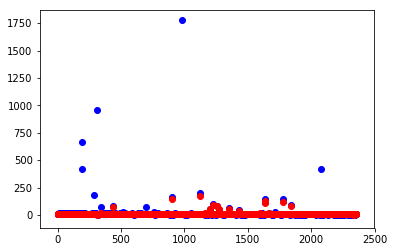

In [21]:
x = range(len(twitter))
y = twitter.rating_numerator
z = twitter.rating_denominator
plt.scatter(x, y,c ='b')
plt.scatter(x, z,c ='r')
plt.show()

In [22]:
for i in range(len(twitter)):
    a = re.findall(r'\d+/\d+', twitter.text[i])
    if len(a)>1:
        print(twitter.tweet_id[i], '\n'+str(a), '\n'+twitter.text[i], '\n'+str(twitter.rating_numerator[i])+'/'+\
              str(twitter.rating_denominator[i]))

881633300179243008 
['17/10', '13/10'] 
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 
17/10
835246439529840640 
['960/00', '13/10'] 
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 
960/0
802624713319034886 
['12/10', '11/10'] 
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 
12/10
777684233540206592 
['12/10', '11/10'] 
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 
12/10
775096608509886464 
['9/11', '14/10'] 
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 
9/11
763167063695355904 
['8/10', '11/10'] 
RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/… 
8/10
7

In [23]:
for i in range(len(twitter)):
    if (twitter.rating_denominator[i]%10==0)&(twitter.rating_numerator[i]<100)&(twitter.rating_denominator[i]>10):
        print(twitter.tweet_id[i], '\n'+twitter.text[i], '\n'+str(twitter.rating_numerator[i])+'/'+\
              str(twitter.rating_denominator[i]))

820690176645140481 
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 
84/70
722974582966214656 
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 
4/20
716439118184652801 
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 
50/50
713900603437621249 
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 
99/90
710658690886586372 
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12 
80/80
709198395643068416 
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK 
45/50
704054845121142784 
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa 
60/50
697463031882764288 
Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t

#### 验证问题8
#### 清除twitter_extra中retweet_count为0的项

In [24]:
twitter_extra[twitter_extra.retweet_count==0]

,favorite_count,id,retweet_count
288,150,838085839343206401,0


#### 验证问题9
#### image_predictions中p1、p2、p3中明显错误的项目
```经过比对发现比如2074行，中orange、bagel、banana```

In [25]:
image_predictions[["p1","p2","p3"]]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


#### 验证问题10
#### 观察检查expanded_urls中值，发现有多个url情况
```为了分析方便，多个url清除掉其他保留1个```

In [26]:
twitter.expanded_urls[4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

### 评估项目数据
#### 数据质量问题
```
（1）twitter的dataframe中不需要处理的数据in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_statu。
（2）twitter的dataframe中狗的name字段含有None,a,an,a,such,quite,the，需要去掉或填充None类型。
（3）twitter的dataframe中狗的name字段None为字符串格式，需要修改为python中None。
（4）twitter的dataframe中timestamp、retweeted_status_timestamp应该为时间格式。
（5）twitter的dataframe中doggo、floofer、pupper、puppo中None不是str应该为None格式
（6）twitter的dataframe中，有的推送的内容中含有2条狗，rating_numerator、rating_denominator有2个评分，这种情况就取2个多平均值。
（7）twitter的dataframe中，有的推送的内容中含有多个“数字/数字”格式内容，提取内容了错误的rating_numerator、rating_denominator。
（8）twitter的dataframe中，有的rating_denominator>10的部分数据中，有的有用数据，需要修改。例如为99/90，可以理解为9条狗总分，修改为11/10
（9）twitter_extra的dataframe中retweet_count为0的异常值
（10）image_predictions的dataframe中p1、p2、p3中明显错误的异常值
```
#### 数据整洁问题
```
（1）所有的数据在多个dataframe中，需要合并到一个dataframe进行分析。以twitter、twitter_extra、image_prediction中对应id为基准合并。
（2）twitter的dataframe中oggo、floofer、pupper、puppo需要合并成1列
```

## 3 清洗项目数据

### 清洗前准备数据

In [27]:
twitter_temp = twitter
twitter_extra_temp = twitter_extra
image_predictions_temp = image_predictions

### 清洗数据1
#### 对应数据质量问题1：twitter的dataframe中不需要处理的数据in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_statu。
#### 处理方法：去掉twitter中转发的数据。drop掉in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_statu列。

In [28]:
twitter_temp = twitter[~((~pd.isnull(twitter.in_reply_to_status_id)) | \
                    (~pd.isnull(twitter.in_reply_to_user_id)) | \
                    (~pd.isnull(twitter.retweeted_status_id)) | \
                    (~pd.isnull(twitter.retweeted_status_user_id)) | \
                    (~pd.isnull(twitter.retweeted_status_timestamp)))].reset_index(drop=True)\
[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [29]:
#验证是否清除成功
twitter_temp.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 清洗数据2
#### 对应数据质量问题2&3：twitter的dataframe中狗的name字段含有a,an,a,such,quite,the，需要去掉或填充python None类型。 twitter的dataframe中狗的name字段None为字符串格式，需要修改为python中None。

#### 处理方法：去掉name字段含有a,an,a,such,quite,the等。转变str的None格式为python None格式

In [30]:
names_to_remove = [x for x in twitter_temp["name"].unique().tolist() if x.islower()]
twitter_temp.name = twitter_temp["name"].apply(lambda x: None if x in ['None']+names_to_remove else x)

In [31]:
#验证是否清除成功
print(twitter_temp.name.head(10))
print(twitter_temp.name[5],type(twitter_temp.name[5]))

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5        None
6         Jax
7        None
8        Zoey
9      Cassie
Name: name, dtype: object
None <class 'NoneType'>


### 清洗数据3
#### 对应数据质量问题4：twitter的dataframe中timestamp、retweeted_status_timestamp应该为时间格式。
#### 处理方法：retweeted_status_timestamp列已经去除，就不处理。把timestamp列转变为datatime用to_datatime函数


In [32]:
twitter_temp.timestamp = pd.to_datetime(twitter_temp['timestamp'].apply(lambda x: x[0:19]),
                                               format="%Y-%m-%d %H:%M:%S")


In [33]:
#验证是否清除成功
twitter_temp.timestamp.dtype

dtype('<M8[ns]')

### 清洗数据4
#### 对应数据质量问题5：twitter的dataframe中doggo、floofer、pupper、puppo中None不是str应该为None格式
#### 处理方法：twitter的dataframe中doggo、floofer、pupper、puppo转变为NaN格式。

In [34]:
twitter_temp.puppo = twitter_temp.puppo.apply(lambda x: None if x=='None' else x)
twitter_temp.doggo = twitter_temp.doggo.apply(lambda x: None if x=='None' else x)
twitter_temp.floofer = twitter_temp.floofer.apply(lambda x: None if x=='None' else x)
twitter_temp.pupper = twitter_temp.pupper.apply(lambda x: None if x=='None' else x)

In [35]:
#验证是否清除成功
print(type(twitter_temp.puppo[1]))
print(twitter_temp.puppo[1])
print(len(twitter_temp))

<class 'NoneType'>
None
2097


### 清洗数据5
#### 对应数据质量问题6：twitter的dataframe中rating_numerator、rating_denominator存在异常值，需清除
#### 处理方法：替换掉rating_numerator、rating_denominator异常值。选取rating_numerator<100，rating_denominator能被10整除，且无误的数据

In [36]:
twitter_temp = twitter_temp[(twitter_temp.rating_numerator<100)]
twitter_temp = twitter_temp[(twitter_temp.rating_denominator == 10)|(twitter_temp.rating_denominator%10==0)]

In [37]:
dict_temp={
747600769478692864:'9/10',
676191832485810177:'9/10',
674646392044941312:'7/10',
670434127938719744:'10/10',
669037058363662336:'9/10',
714258258790387713:'9/10',
740373189193256964:'14/10',
722974582966214656:'13/10',
716439118184652801:'11/10',
695064344191721472:'13/10',
682962037429899265:'10/10',
666287406224695296:'9/10',
713900603437621249:'11/10',
697463031882764288:'11/10',
675853064436391936:'11/10',
710658690886586372:'10/10',}

for i in dict_temp:
    twitter_temp.loc[twitter_temp['tweet_id'] == i, "rating_numerator"] = \
    int(dict_temp[i].split('/')[0])
    twitter_temp.loc[twitter_temp['tweet_id'] == i, "rating_denominator"] = \
    int(dict_temp[i].split('/')[1])

In [38]:
twitter_temp[twitter_temp.tweet_id == 710658690886586372]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1036,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,10,None,None,None,None,None


In [39]:
twitter_temp = twitter_temp[twitter_temp.rating_denominator == 10]

In [40]:
twitter_temp.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 清洗数据6
#### 对应数据质量问题7：twitter_extra的dataframe中retweet_count为0的异常值
#### 处理方法：清除retweet_count为0的异常值

In [41]:
twitter_extra_temp = twitter_extra_temp[twitter_extra_temp.retweet_count > 0]

In [42]:
#验证是否清除成功
print(len(twitter_extra_temp[twitter_extra_temp.retweet_count == 0]))

0


### 清洗数据7
#### 对应数据质量问题8：image_predictions的dataframe中p1、p2、p3中明显错误的异常值
#### 处理方法：p1、p2、p3中为dog的话，p1_dog、p2_dog、p3_dog中为Ture，根据这个清除都为False的选项

In [43]:
image_predictions_temp = image_predictions_temp[(image_predictions_temp.p1_dog == True)|(image_predictions_temp.p2_dog == True)|(image_predictions_temp.p3_dog == True)]

In [44]:
#验证是否清除成功
print(image_predictions_temp[["p1","p2","p3"]].head(5))
print(len(image_predictions_temp[((image_predictions_temp.p1_dog==False) &
                  (image_predictions_temp.p2_dog==False) & 
                  (image_predictions_temp.p3_dog==False))]))

                       p1                  p2                   p3
0  Welsh_springer_spaniel              collie    Shetland_sheepdog
1                 redbone  miniature_pinscher  Rhodesian_ridgeback
2         German_shepherd            malinois           bloodhound
3     Rhodesian_ridgeback             redbone   miniature_pinscher
4      miniature_pinscher          Rottweiler             Doberman
0


### 清洗数据8
#### 对应整洁问题3：twitter的dataframe中doggo、floofer、pupper、puppo需要合并成1列
#### 处理方法：合并为1列，合并过程中会有一些损失。

In [45]:
twitter_temp1 = twitter_temp
twitter_temp['growth']=twitter_temp['puppo'].fillna(twitter_temp['pupper']).fillna(twitter_temp['doggo']).fillna(twitter_temp['floofer'])

In [46]:
print(len(twitter_temp[twitter_temp.growth == 'floofer']),len(twitter_temp1[twitter_temp1.floofer== 'floofer']))
print(len(twitter_temp[twitter_temp.growth == 'puppo']),len(twitter_temp1[twitter_temp1.puppo== 'puppo']))
print(len(twitter_temp[twitter_temp.growth == 'pupper']),len(twitter_temp1[twitter_temp1.pupper== 'pupper']))
print(len(twitter_temp[twitter_temp.growth == 'doggo']),len(twitter_temp1[twitter_temp1.doggo== 'doggo']))

9 10
24 24
230 230
73 83


### 清洗数据9
#### 数据分析所需：合并image_prediction中p1、p2、p3
#### 处理方法：首先需要p1_dog、p2_dog、p3_dog为False时，p1、p2、p3中填充None，p1_conf、p2_conf、p3_conf中填充NaN，然后合并p1、p2、p3和p1_conf、p2_conf、p3_conf

In [51]:
image_predictions_temp.loc[image_predictions_temp.p1_dog == False, "p1"] = None
image_predictions_temp.loc[image_predictions_temp.p2_dog == False, "p2"] = None
image_predictions_temp.loc[image_predictions_temp.p3_dog == False, "p3"] = None
image_predictions_temp.loc[image_predictions_temp.p1_dog == False, "p1_conf"] = np.nan
image_predictions_temp.loc[image_predictions_temp.p2_dog == False, "p2_conf"] = np.nan
image_predictions_temp.loc[image_predictions_temp.p3_dog == False, "p3_conf"] = np.nan

In [48]:
image_predictions_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1751 non-null bool
p2          1553 non-null object
p2_conf     1553 non-null float64
p2_dog      1751 non-null bool
p3          1499 non-null object
p3_conf     1499 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [52]:
image_predictions_temp["p"] =  image_predictions_temp["p1"].fillna(image_predictions_temp["p2"]).fillna(image_predictions_temp["p3"])
image_predictions_temp["p_conf"] = image_predictions_temp["p1_conf"].fillna(image_predictions_temp["p2_conf"]).fillna(image_predictions_temp["p3_conf"])

image_predictions_temp = image_predictions_temp.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                                             axis=1)

In [53]:
image_predictions_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p           1751 non-null object
p_conf      1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


### 清洗数据10
#### 对应整洁问题1：所有的数据在多个dataframe中，需要合并到一个dataframe进行分析。以twitter、twitter_extra、image_prediction中对应id为基准合并。
#### 处理方法：合并为1个twitter_archive_master的dataframe

In [128]:
twitter_extra_temp.columns = ['favorite_count','tweet_id','retweet_count']
twitter_extra_temp.head()

,favorite_count,tweet_id,retweet_count
0,39492,892420643555336193,8842
1,33786,892177421306343426,6480
2,25445,891815181378084864,4301
3,42863,891689557279858688,8925
4,41016,891327558926688256,9721


In [54]:
twitter_temp = twitter_temp.drop(['source','puppo','pupper','floofer','doggo'],axis=1)

In [58]:
twitter_archive_master = twitter_temp.merge(image_predictions_temp).merge(twitter_extra_temp)

In [59]:
twitter_archive_master.info()

## 4 存储、分析和可视化项目数据

### 存储数据
#### twitter_archive_master存储到twitter_archive_master.csv中

In [133]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

####  读取twitter_archive_master.csv中数据到twitter_master中

In [61]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [62]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 14 columns):
tweet_id              1958 non-null int64
timestamp             1958 non-null object
text                  1958 non-null object
expanded_urls         1958 non-null object
rating_numerator      1958 non-null int64
rating_denominator    1958 non-null int64
name                  1346 non-null object
growth                303 non-null object
jpg_url               1958 non-null object
img_num               1958 non-null int64
p                     1656 non-null object
p_conf                1656 non-null float64
favorite_count        1958 non-null int64
retweet_count         1958 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 214.2+ KB


### 分析及可视化

In [63]:
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p_conf,favorite_count,retweet_count
count,1.958000e+03,1958.000000,1958.0,1958.000000,1656.000000,1958.000000,1958.000000
mean,7.361244e+17,10.592441,10.0,1.201736,0.551294,8959.870787,2775.974974
std,6.762632e+16,2.658638,0.0,0.558903,0.298930,12450.418944,4730.005943
min,6.660209e+17,0.000000,10.0,1.000000,0.000010,81.000000,15.000000
25%,6.758475e+17,10.000000,10.0,1.000000,0.305576,1965.250000,622.250000
50%,7.088226e+17,11.000000,10.0,1.000000,0.550749,4117.000000,1357.000000
75%,7.881713e+17,12.000000,10.0,1.000000,0.822937,11361.750000,3220.750000
max,8.924206e+17,75.000000,10.0,4.000000,0.999956,132318.000000,79116.000000


#### 1. 提出问题:以时间线展示retweet_count和favorite_count，分析比较两者情况。

In [64]:
ts = pd.to_datetime(twitter_master['timestamp'].apply(lambda x: x[0:10]),
                                               format="%Y-%m-%d")

In [65]:
ts.head()

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: timestamp, dtype: datetime64[ns]

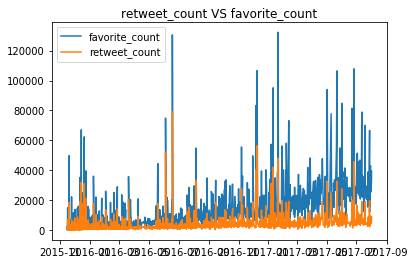

In [66]:
y41_favorit = twitter_master.favorite_count
y41_retweet = twitter_master.retweet_count
plt.plot(ts,y41_favorit)
plt.plot(ts,y41_retweet)
plt.title('retweet_count VS favorite_count')
plt.legend()
plt.show()

#### 1. 得出结论：
```
(1)retweet_count和favorite_count均有增长趋势
(2)favorite_count比retweet_count量高。
```

#### 2.0 提出问题：想看图片识别准确率0.9以上，top10的狗的品种

In [140]:
twitter_master_temp = twitter_master[twitter_master.p_conf >= 0.9]
dog_favorite = twitter_master_temp.groupby(['p']).count()
dog_favorite.sort_values(['favorite_count'], ascending = False).head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,growth,jpg_url,img_num,p_conf,favorite_count,retweet_count
p,,,,,,,,,,,,,
golden_retriever,36,36,36,36,36,36,29,7,36,36,36,36,36
Pembroke,26,26,26,26,26,26,19,2,26,26,26,26,26
pug,24,24,24,24,24,24,18,2,24,24,24,24,24
Samoyed,21,21,21,21,21,21,15,3,21,21,21,21,21
Labrador_retriever,17,17,17,17,17,17,11,2,17,17,17,17,17
Pomeranian,16,16,16,16,16,16,13,5,16,16,16,16,16
Chihuahua,13,13,13,13,13,13,10,1,13,13,13,13,13
French_bulldog,12,12,12,12,12,12,11,2,12,12,12,12,12
chow,9,9,9,9,9,9,8,1,9,9,9,9,9


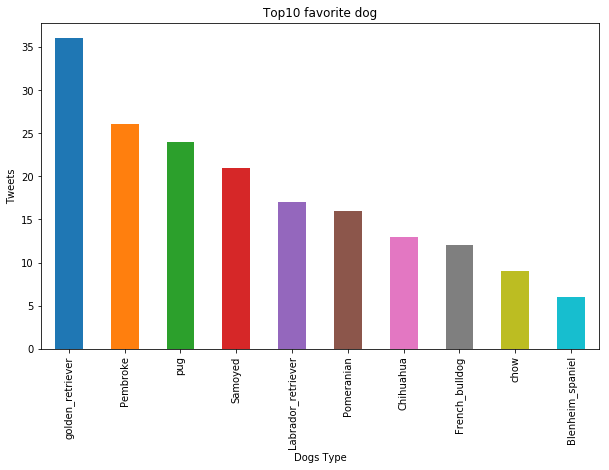

In [141]:
dog_favorite_top10 = dog_favorite.sort_values(['favorite_count'], ascending = False).head(10)
dog_favorite_top10 = dog_favorite_top10.reset_index()
dog_favorite_top10.plot(x='p', y='tweet_id', kind='bar', figsize=(10,6), legend=None);
plt.ylabel('Tweets')
plt.xlabel('Dogs Type')
plt.title('Top10 favorite dog');

#### 2.得出结论：
```
top10分别为：golden_retriever、Pembroke、pug、Samoyed、Labrador_retriever、Pomeranian、French_bulldog、Chihuahua、chow、Blenheim_spaniel
```

#### 3.0 提出问题：所发twitter中哪个评分段的dog最多

In [148]:
twitter_master_temp2 = twitter_master_temp.groupby(['rating_numerator']).count()
twitter_master_temp2

,tweet_id,timestamp,text,expanded_urls,rating_denominator,name,growth,jpg_url,img_num,p,p_conf,favorite_count,retweet_count
rating_numerator,,,,,,,,,,,,,
3,1,1,1,1,1,1,0,1,1,1,1,1,1
5,4,4,4,4,4,3,0,4,4,4,4,4,4
7,2,2,2,2,2,2,0,2,2,2,2,2,2
8,8,8,8,8,8,6,0,8,8,8,8,8,8
9,19,19,19,19,19,16,3,19,19,19,19,19,19
10,54,54,54,54,54,36,7,54,54,54,54,54,54
11,64,64,64,64,64,56,9,64,64,64,64,64,64
12,85,85,85,85,85,70,10,85,85,85,85,85,85
13,45,45,45,45,45,34,11,45,45,45,45,45,45


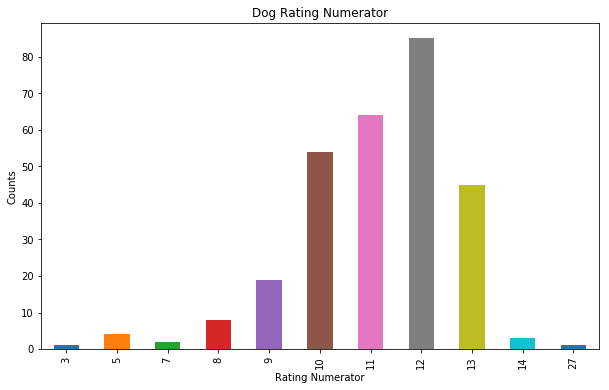

In [149]:
twitter_master_temp2 = twitter_master_temp2.reset_index()
twitter_master_temp2.plot(x='rating_numerator', y='tweet_id', kind='bar', figsize=(10,6), legend=None);
plt.ylabel('Counts')
plt.xlabel('Rating Numerator')
plt.title('Dog Rating Numerator');

#### 3.得出结论：
```
根据数据中反应情结果：rating_numerator/rating_denominator为12/10的狗狗数量最多。
```